# 4. Federated Averaging Simulation
## 4.1 Imports and Setup
## 4.2 Define Client Model (TinyML MLP)
## 4.3 Simulate Local Training on Clients
## 4.4 Federated Averaging Logic
## 4.5 Global Model Evaluation
## 4.6 Accuracy Plot and Insights

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
def create_model():
    model = Sequential([
        tf.keras.Input(shape=(2,)),
        Dense(8, activation='relu'),
        Dense(4, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [3]:
def generate_client_data(samples=500):
    snr = np.random.uniform(0, 20, samples)
    noise = 1 / (10 ** (snr / 10))
    X = np.stack([snr, noise], axis=1)
    y = (snr > 10).astype(int)
    return X, y

client_models = []
client_histories = []

for i in range(5):  # Simulate 5 clients
    model = create_model()
    X, y = generate_client_data()
    history = model.fit(X, y, epochs=5, batch_size=32, verbose=0)
    client_models.append(model)
    client_histories.append(history)

In [4]:
def federated_average(models):
    weights = [model.get_weights() for model in models]
    avg_weights = []

    for layer_weights in zip(*weights):
        layer_avg = np.mean(layer_weights, axis=0)
        avg_weights.append(layer_avg)

    global_model = create_model()
    global_model.set_weights(avg_weights)
    return global_model

In [5]:
X_test, y_test = generate_client_data(samples=1000)
global_model = federated_average(client_models)
loss, acc = global_model.evaluate(X_test, y_test, verbose=0)
print(f"✅ Global Model Accuracy: {acc:.4f}")

✅ Global Model Accuracy: 0.8250


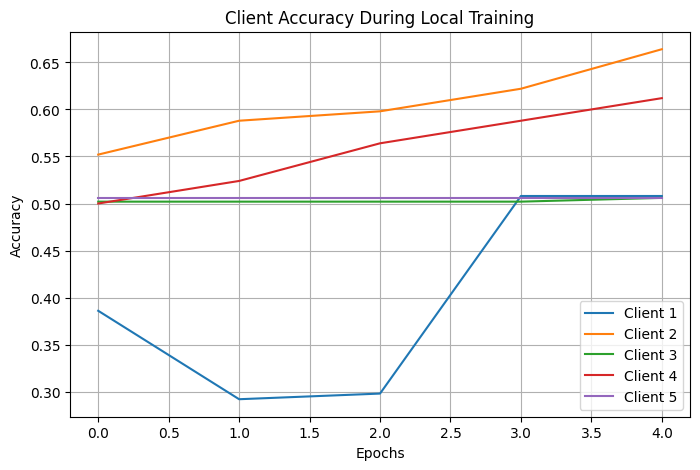

In [7]:
plt.figure(figsize=(8, 5))
for i, history in enumerate(client_histories):
    plt.plot(history.history['accuracy'], label=f'Client {i+1}')
plt.title("Client Accuracy During Local Training")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.savefig("../plots/federated_client_accuracy.png")
plt.show()